## Import libraries

In [2]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from datetime import datetime

In [3]:
#Read in csv file

train = pd.read_csv('../datasets/train.csv')
test = pd.read_csv('../datasets/test.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [5]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [6]:
train['belongs_to_collection'].head()

0    [{'id': 313576, 'name': 'Hot Tub Time Machine ...
1    [{'id': 107674, 'name': 'The Princess Diaries ...
2                                                  NaN
3                                                  NaN
4                                                  NaN
Name: belongs_to_collection, dtype: object

In [7]:
train[train['budget']==0]['budget'].count()

812

In [8]:
train[train['budget']==0].head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970
7,8,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,tt0391024,en,Control Room,A chronicle which provides a rare window into ...,1.949044,...,1/15/04,84.0,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...",Released,Different channels. Different truths.,Control Room,"[{'id': 917, 'name': 'journalism'}, {'id': 163...","[{'cast_id': 2, 'character': 'Himself', 'credi...","[{'credit_id': '52fe47a69251416c750a0daf', 'de...",2586511
8,9,"[{'id': 256377, 'name': 'The Muppet Collection...",0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",NaN,tt0117110,en,Muppet Treasure Island,After telling the story of Flint's last journe...,6.902423,...,2/16/96,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Set sail for Muppet mayhem!,Muppet Treasure Island,"[{'id': 2041, 'name': 'island'}, {'id': 4418, ...","[{'cast_id': 1, 'character': 'Long John Silver...","[{'credit_id': '52fe43c89251416c7501deb3', 'de...",34327391
11,12,"[{'id': 48190, 'name': 'Revenge of the Nerds C...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt0093857,en,Revenge of the Nerds II: Nerds in Paradise,The members of the Lambda Lambda Lambda frater...,10.543750,...,7/10/87,98.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,They're Back!,Revenge of the Nerds II: Nerds in Paradise,"[{'id': 5801, 'name': 'nerd'}, {'id': 6876, 'n...","[{'cast_id': 2, 'character': 'Lewis Skolnick',...","[{'credit_id': '52fe46f49251416c750891e9', 'de...",22642033
17,18,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,tt1700845,en,The Invisible Woman,"In 1857, at the height of his fame and fortune...",4.183558,...,12/25/13,111.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,His greatest story was the one he could never ...,The Invisible Woman,"[{'id': 5565, 'name': 'biography'}, {'id': 180...","[{'cast_id': 7, 'character': 'Charles Dickens'...","[{'credit_id': '53b94a260e0a2676c7009b37', 'de...",1234254


In [9]:
# budget = 0 ????

### replace 0 to nan in budget column

In [10]:
train['budget'].replace(0, np.nan, inplace=True)

In [11]:
test['budget'].replace(0, np.nan, inplace=True)

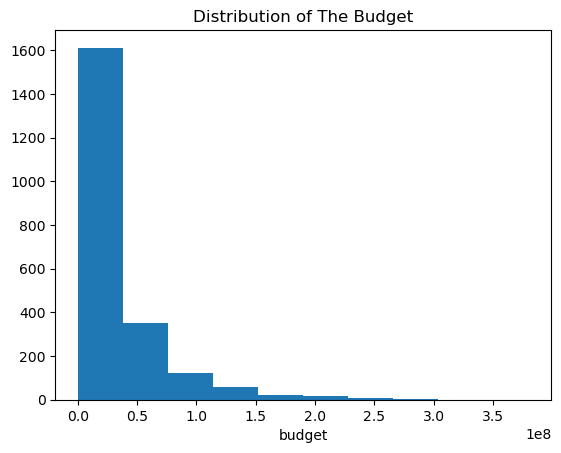

In [12]:
plt.hist(train['budget'])
plt.xlabel("budget")
plt.title("Distribution of The Budget");

In [13]:
train['poster_path'].head()

0    /tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg
1    /w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg
2    /lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg
3    /aTXRaPrWSinhcmCrcfJK17urp3F.jpg
4    /m22s7zvkVFDU9ir56PiiqIEWFdT.jpg
Name: poster_path, dtype: object

In [14]:
train['production_companies'].head()

0    [{'name': 'Paramount Pictures', 'id': 4}, {'na...
1          [{'name': 'Walt Disney Pictures', 'id': 2}]
2    [{'name': 'Bold Films', 'id': 2266}, {'name': ...
3                                                  NaN
4                                                  NaN
Name: production_companies, dtype: object

In [15]:
train['production_countries'].head()

0    [{'iso_3166_1': 'US', 'name': 'United States o...
1    [{'iso_3166_1': 'US', 'name': 'United States o...
2    [{'iso_3166_1': 'US', 'name': 'United States o...
3              [{'iso_3166_1': 'IN', 'name': 'India'}]
4        [{'iso_3166_1': 'KR', 'name': 'South Korea'}]
Name: production_countries, dtype: object

In [16]:
train['spoken_languages'].head()

0             [{'iso_639_1': 'en', 'name': 'English'}]
1             [{'iso_639_1': 'en', 'name': 'English'}]
2             [{'iso_639_1': 'en', 'name': 'English'}]
3    [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
4             [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]
Name: spoken_languages, dtype: object

In [17]:
# spoken languages and original languages the same?????

In [18]:
train['status'].head()

0    Released
1    Released
2    Released
3    Released
4    Released
Name: status, dtype: object

In [19]:
train['status'].value_counts()

status
Released    2996
Rumored        4
Name: count, dtype: int64

In [20]:
train[train['status']=='Rumored']

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
609,610,"[{'id': 144200, 'name': 'Swan Princess Series'...",NaN,"[{'id': 14, 'name': 'Fantasy'}, {'id': 16, 'na...",NaN,tt0120254,en,The Swan Princess: Escape from Castle Mountain,The first wedding anniversary of Princess Odet...,5.121309,...,1/1/97,71.0,"[{'iso_639_1': 'da', 'name': 'Dansk'}, {'iso_6...",Rumored,It Will Take All Her Magic to Rescue Her Friends!,The Swan Princess: Escape from Castle Mountain,"[{'id': 3071, 'name': 'prince'}, {'id': 4456, ...","[{'cast_id': 2, 'character': 'Odette (voice)',...","[{'credit_id': '52fe488bc3a36847f816cfd3', 'de...",273644
1007,1008,NaN,NaN,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt1860180,en,Billy Gardell: Halftime,"Billy Gardell, the star of CBS' hit comedy ""Mi...",0.007877,...,2/5/11,60.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Rumored,NaN,Billy Gardell: Halftime,NaN,"[{'cast_id': 9, 'character': 'Himself', 'credi...","[{'credit_id': '52fe4be1c3a368484e19d265', 'de...",60
1216,1217,NaN,NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,tt0091024,en,Extremities,A woman escapes from the man who is about to r...,10.273979,...,8/22/86,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Rumored,"When fear made her a victim, she turned fear i...",Extremities,"[{'id': 2483, 'name': 'nudity'}, {'id': 2539, ...","[{'cast_id': 1, 'character': 'Marjorie', 'cred...","[{'credit_id': '582cca1c925141780b00259f', 'de...",13418091
1618,1619,NaN,891000.0,"[{'id': 99, 'name': 'Documentary'}]",NaN,tt0145394,en,A Place Called Chiapas,"On January 1, 1994, the Zapatista National Lib...",0.179246,...,2/20/98,89.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Rumored,Inside the world's first postmodern revolution,A Place Called Chiapas,"[{'id': 187056, 'name': 'woman director'}]","[{'cast_id': 1, 'character': 'Himself', 'credi...","[{'credit_id': '57b4f7619251417287000dfc', 'de...",229000


In [21]:
train['tagline'].head()

0    The Laws of Space and Time are About to be Vio...
1    It can take a lifetime to find true love; she'...
2      The road to greatness can take you to the edge.
3                                                  NaN
4                                                  NaN
Name: tagline, dtype: object

In [22]:
train['title'].head()

0                      Hot Tub Time Machine 2
1    The Princess Diaries 2: Royal Engagement
2                                    Whiplash
3                                     Kahaani
4                                  Marine Boy
Name: title, dtype: object

In [23]:
train['Keywords'].head()

0    [{'id': 4379, 'name': 'time travel'}, {'id': 9...
1    [{'id': 2505, 'name': 'coronation'}, {'id': 42...
2    [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...
3    [{'id': 10092, 'name': 'mystery'}, {'id': 1054...
4                                                  NaN
Name: Keywords, dtype: object

In [24]:
train['cast'].head()

0    [{'cast_id': 4, 'character': 'Lou', 'credit_id...
1    [{'cast_id': 1, 'character': 'Mia Thermopolis'...
2    [{'cast_id': 5, 'character': 'Andrew Neimann',...
3    [{'cast_id': 1, 'character': 'Vidya Bagchi', '...
4    [{'cast_id': 3, 'character': 'Chun-soo', 'cred...
Name: cast, dtype: object

In [25]:
train['crew'].head()

0    [{'credit_id': '59ac067c92514107af02c8c8', 'de...
1    [{'credit_id': '52fe43fe9251416c7502563d', 'de...
2    [{'credit_id': '54d5356ec3a3683ba0000039', 'de...
3    [{'credit_id': '52fe48779251416c9108d6eb', 'de...
4    [{'credit_id': '52fe464b9251416c75073b43', 'de...
Name: crew, dtype: object

In [26]:
# drop belongs_to_collection, homepage, imdb_id, original_language,  original_title ,
# overview, poster_path, tagline, title, Keywords, cast, crew

In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4398 non-null   int64  
 1   belongs_to_collection  877 non-null    object 
 2   budget                 3187 non-null   float64
 3   genres                 4382 non-null   object 
 4   homepage               1420 non-null   object 
 5   imdb_id                4398 non-null   object 
 6   original_language      4398 non-null   object 
 7   original_title         4398 non-null   object 
 8   overview               4384 non-null   object 
 9   popularity             4398 non-null   float64
 10  poster_path            4397 non-null   object 
 11  production_companies   4140 non-null   object 
 12  production_countries   4296 non-null   object 
 13  release_date           4397 non-null   object 
 14  runtime                4394 non-null   float64
 15  spok

In [28]:
#Dropping columns with a lot of missing values and columns won't be used in analysis

train = train.drop(columns = ['belongs_to_collection','homepage', 'imdb_id',
                              'spoken_languages','original_title','overview',
                              'poster_path','status','tagline', 'title', 
                              'Keywords','cast', 'crew'])

In [29]:
test = test.drop(columns = ['belongs_to_collection','homepage', 'imdb_id',
                              'spoken_languages','original_title','overview',
                              'poster_path','status','tagline', 'title', 
                              'Keywords','cast', 'crew'])

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3000 non-null   int64  
 1   budget                2188 non-null   float64
 2   genres                2993 non-null   object 
 3   original_language     3000 non-null   object 
 4   popularity            3000 non-null   float64
 5   production_companies  2844 non-null   object 
 6   production_countries  2945 non-null   object 
 7   release_date          3000 non-null   object 
 8   runtime               2998 non-null   float64
 9   revenue               3000 non-null   int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 234.5+ KB


In [31]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4398 non-null   int64  
 1   budget                3187 non-null   float64
 2   genres                4382 non-null   object 
 3   original_language     4398 non-null   object 
 4   popularity            4398 non-null   float64
 5   production_companies  4140 non-null   object 
 6   production_countries  4296 non-null   object 
 7   release_date          4397 non-null   object 
 8   runtime               4394 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 309.4+ KB


In [32]:
type(train['genres'])

pandas.core.series.Series

In [33]:
# train['genres'] = train['genres'].str.replace(" ", '').astype(object)

In [ ]:
# Arjun worte did function

In [34]:
big_dict = {'genres': 'name', 
            'production_countries': 'name',
            'production_companies': 'name'}

In [35]:
def feature_extractor(l, key_we_want):
    # Input: l is the list we want to extract from.
    #        key_we_want is the key we want lol
    
    return [d[key_we_want] for d in l]

In [36]:
for col_name, info_we_want in big_dict.items():
    
    
    
    train[col_name] = train[col_name][train[col_name].notna()].apply(ast.literal_eval) 
    test[col_name] = test[col_name][test[col_name].notna()].apply(ast.literal_eval) 
    
    train[col_name] = train[col_name][train[col_name].notna()].apply(lambda x: feature_extractor(x, info_we_want))
    test[col_name] = test[col_name][test[col_name].notna()].apply(lambda x: feature_extractor(x, info_we_want))

In [ ]:
# Brandon and Ajun wrote code to transform the time data

In [37]:
train['release_date'] = train['release_date'].apply(lambda x: int(datetime.strptime(x, "%m/%d/%y").timestamp()))

In [38]:
train['release_date'].dtype

dtype('int64')

In [39]:
test['release_date'] = test['release_date'][test['release_date'].notna()].apply(lambda x: int(datetime.strptime(x, "%m/%d/%y").timestamp()))

In [40]:
train['release_date'].head()

0    1424412000
1    1091768400
2    1412917200
3    1331272800
4    1233813600
Name: release_date, dtype: int64

In [41]:
train.head()

,id,budget,genres,original_language,popularity,production_companies,production_countries,release_date,runtime,revenue
0,1,14000000.0,[Comedy],en,6.575393,"[Paramount Pictures, United Artists, Metro-Gol...",[United States of America],1424412000,93.0,12314651
1,2,40000000.0,"[Comedy, Drama, Family, Romance]",en,8.248895,[Walt Disney Pictures],[United States of America],1091768400,113.0,95149435
2,3,3300000.0,[Drama],en,64.299990,"[Bold Films, Blumhouse Productions, Right of W...",[United States of America],1412917200,105.0,13092000
3,4,1200000.0,"[Thriller, Drama]",hi,3.174936,NaN,[India],1331272800,122.0,16000000
4,5,NaN,"[Action, Thriller]",ko,1.148070,NaN,[South Korea],1233813600,118.0,3923970


In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3000 non-null   int64  
 1   budget                2188 non-null   float64
 2   genres                2993 non-null   object 
 3   original_language     3000 non-null   object 
 4   popularity            3000 non-null   float64
 5   production_companies  2844 non-null   object 
 6   production_countries  2945 non-null   object 
 7   release_date          3000 non-null   int64  
 8   runtime               2998 non-null   float64
 9   revenue               3000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 234.5+ KB


In [43]:
test.head()

,id,budget,genres,original_language,popularity,production_companies,production_countries,release_date,runtime
0,3001,NaN,"[Adventure, Animation, Family, Fantasy]",ja,3.851534,NaN,"[Japan, United States of America]",1.184389e+09,90.0
1,3002,88000.0,"[Horror, Science Fiction]",en,3.559789,[Woolner Brothers Pictures Inc.],[United States of America],2.789010e+09,65.0
2,3003,NaN,"[Comedy, Romance]",en,8.085194,"[Warner Bros., Outlaw Productions (I), Miramax]",[United States of America],8.643636e+08,100.0
3,3004,6800000.0,"[Drama, War, Mystery]",fr,8.596012,"[TS Productions, Micro scope, Phi Group]","[Canada, France]",1.283576e+09,130.0
4,3005,2000000.0,"[History, Documentary]",en,3.217680,NaN,[United States of America],1.108102e+09,92.0


In [44]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4398 non-null   int64  
 1   budget                3187 non-null   float64
 2   genres                4382 non-null   object 
 3   original_language     4398 non-null   object 
 4   popularity            4398 non-null   float64
 5   production_companies  4140 non-null   object 
 6   production_countries  4296 non-null   object 
 7   release_date          4397 non-null   float64
 8   runtime               4394 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 309.4+ KB


In [45]:
#train.to_csv('../datasets/train_time.csv')

In [46]:
#test.to_csv('../datasets/test_time.csv')

## Dummy categorical columns

In [47]:
train['production_companies']

0       [Paramount Pictures, United Artists, Metro-Gol...
1                                  [Walt Disney Pictures]
2       [Bold Films, Blumhouse Productions, Right of W...
3                                                     NaN
4                                                     NaN
                              ...                        
2995             [Warner Bros., Morgan Creek Productions]
2996                           [Memfis Film, Film i Väst]
2997    [New Line Cinema, Forge, The Steve Tisch Company]
2998                   [Jersey Films, Loofah Productions]
2999    [Lions Gate Films, Vertigo Entertainment, Goth...
Name: production_companies, Length: 3000, dtype: object

In [48]:
train['genres'].nunique

<bound method IndexOpsMixin.nunique of 0                                 [Comedy]
1         [Comedy, Drama, Family, Romance]
2                                  [Drama]
3                        [Thriller, Drama]
4                       [Action, Thriller]
                       ...                
2995                     [Comedy, Romance]
2996                        [Drama, Music]
2997    [Crime, Action, Mystery, Thriller]
2998                     [Comedy, Romance]
2999           [Thriller, Action, Mystery]
Name: genres, Length: 3000, dtype: object>

In [49]:
genres_dummies = pd.get_dummies(train['genres'].explode(), prefix='genre')

genres_dummies = genres_dummies.groupby(genres_dummies.index).sum()

train_dummy = pd.concat([train,genres_dummies], axis=1)

train_dummy.drop('genres', axis=1, inplace=True)

In [50]:
production_country_dummies = pd.get_dummies(train['production_countries'].explode(), prefix='prod_country')

production_country_dummies = production_country_dummies.groupby(production_country_dummies.index).sum()

train_dummy = pd.concat([train_dummy,production_country_dummies], axis=1)

train_dummy.drop('production_countries', axis=1, inplace=True)

In [51]:
production_company_dummies = pd.get_dummies(train['production_companies'].explode(), prefix='prod_company')

production_company_dummies = production_company_dummies.groupby(production_company_dummies.index).sum()

train = pd.concat([train,production_company_dummies], axis=1)

train.drop('production_companies', axis=1, inplace=True)

In [52]:
train_dummy = pd.get_dummies(train_dummy, columns=['original_language'], drop_first=True)
train_dummy.head()

,id,budget,popularity,production_companies,release_date,runtime,revenue,genre_Action,genre_Adventure,genre_Animation,...,original_language_ro,original_language_ru,original_language_sr,original_language_sv,original_language_ta,original_language_te,original_language_tr,original_language_ur,original_language_vi,original_language_zh
0,1,14000000.0,6.575393,"[Paramount Pictures, United Artists, Metro-Gol...",1424412000,93.0,12314651,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,2,40000000.0,8.248895,[Walt Disney Pictures],1091768400,113.0,95149435,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,3,3300000.0,64.299990,"[Bold Films, Blumhouse Productions, Right of W...",1412917200,105.0,13092000,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,4,1200000.0,3.174936,NaN,1331272800,122.0,16000000,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,5,NaN,1.148070,NaN,1233813600,118.0,3923970,1,0,0,...,False,False,False,False,False,False,False,False,False,False


In [53]:
train_dummy.shape

(3000, 136)

In [54]:
#train_dummy.to_csv('../datasets/train_dummy.csv')

### Test data

In [55]:
genres_dummies = pd.get_dummies(test['genres'].explode(), prefix='genre')

genres_dummies = genres_dummies.groupby(genres_dummies.index).sum()

test_dummy = pd.concat([test,genres_dummies], axis=1)

test_dummy.drop('genres', axis=1, inplace=True)

In [56]:
production_country_dummies = pd.get_dummies(test['production_countries'].explode(), prefix='prod_country')

production_country_dummies = production_country_dummies.groupby(production_country_dummies.index).sum()

test_dummy = pd.concat([test_dummy,production_country_dummies], axis=1)

test_dummy.drop('production_countries', axis=1, inplace=True)

In [57]:
production_company_dummies = pd.get_dummies(test['production_companies'].explode(), prefix='prod_company')

production_company_dummies = production_company_dummies.groupby(production_company_dummies.index).sum()

test_dummy = pd.concat([test_dummy,production_company_dummies], axis=1)

test_dummy.drop('production_companies', axis=1, inplace=True)

In [58]:
test_dummy = pd.get_dummies(test_dummy, columns=['original_language'], drop_first=True)
test_dummy.head()

,id,budget,popularity,release_date,runtime,genre_Action,genre_Adventure,genre_Animation,genre_Comedy,genre_Crime,...,original_language_ru,original_language_sr,original_language_sv,original_language_ta,original_language_te,original_language_th,original_language_tr,original_language_ur,original_language_xx,original_language_zh
0,3001,NaN,3.851534,1.184389e+09,90.0,0,1,1,0,0,...,False,False,False,False,False,False,False,False,False,False
1,3002,88000.0,3.559789,2.789010e+09,65.0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,3003,NaN,8.085194,8.643636e+08,100.0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,False,False
3,3004,6800000.0,8.596012,1.283576e+09,130.0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,3005,2000000.0,3.217680,1.108102e+09,92.0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [59]:
test_dummy.shape

(4398, 5160)

In [60]:
test_dummy.to_csv('../datasets/test_dummy.csv')

In [61]:
test_dummy.columns 

Index(['id', 'budget', 'popularity', 'release_date', 'runtime', 'genre_Action',
       'genre_Adventure', 'genre_Animation', 'genre_Comedy', 'genre_Crime',
       ...
       'original_language_ru', 'original_language_sr', 'original_language_sv',
       'original_language_ta', 'original_language_te', 'original_language_th',
       'original_language_tr', 'original_language_ur', 'original_language_xx',
       'original_language_zh'],
      dtype='object', length=5160)

In [62]:
train_dummy.columns

Index(['id', 'budget', 'popularity', 'production_companies', 'release_date',
       'runtime', 'revenue', 'genre_Action', 'genre_Adventure',
       'genre_Animation',
       ...
       'original_language_ro', 'original_language_ru', 'original_language_sr',
       'original_language_sv', 'original_language_ta', 'original_language_te',
       'original_language_tr', 'original_language_ur', 'original_language_vi',
       'original_language_zh'],
      dtype='object', length=136)

In [63]:
test_drop = [column for column in test_dummy.columns if column not in train_dummy.columns]

In [65]:
train_drop = [column for column in train_dummy.columns if column not in test_dummy.columns]

In [66]:
train_dummy.drop(columns= train_drop, inplace=True)

In [67]:
test_dummy.drop(columns = test_drop, inplace=True)

In [71]:
train_dummy['revenue']=train['revenue'] 

In [72]:
train_dummy.shape

(3000, 115)

In [69]:
test_dummy.shape

(4398, 114)

In [73]:
train_dummy.to_csv('../datasets/train_dummy.csv', index=False)

In [74]:
test_dummy.to_csv('../datasets/test_dummy.csv', index=False)